<a href="https://colab.research.google.com/github/SubhrajeetGhose/DeepLearning-CampusX/blob/main/RNN_Deep_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,LSTM,GRU

In [ ]:
# Load the IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to have the same length
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [ ]:
# Define the RNN model
model = Sequential([
    Embedding(10000, 32, input_length=100), # Embedding layer to convert words to vectors
    SimpleRNN(5, return_sequences=True),   # RNN layer with 5 units # return_sequences=True indicates that to return  the O/P of this layer to next layer
    SimpleRNN(5),                          # Another RNN layer with 5 units
    Dense(1, activation='sigmoid')          # Output layer for binary classification
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 100, 5)            190       
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320251 (1.22 MB)
Trainable params: 320251 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


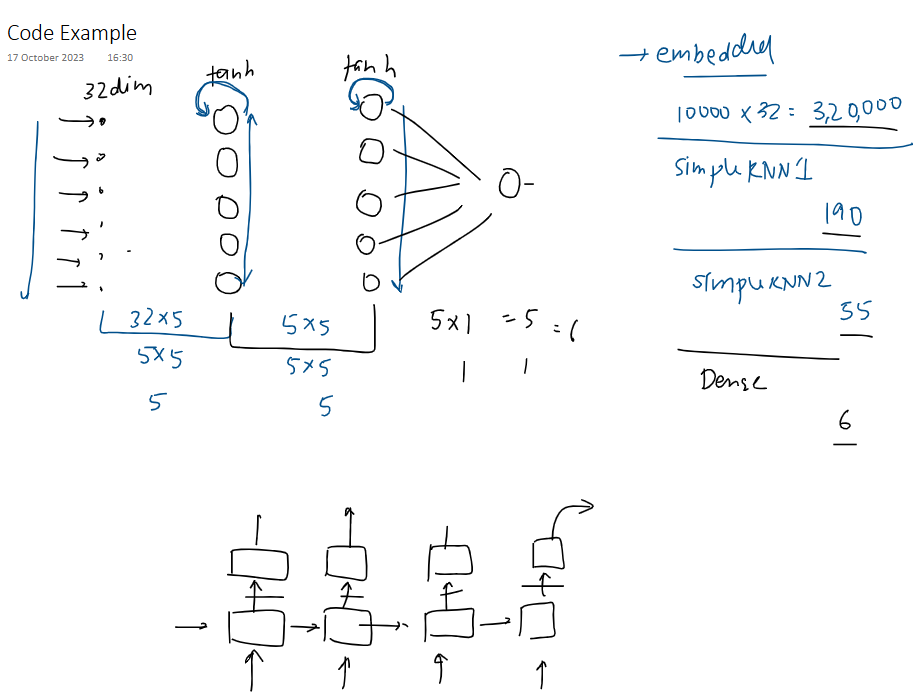

In [ ]:
# Define the LSTM model
model = Sequential([
    Embedding(10000, 32, input_length=100),
    LSTM(5, return_sequences=True),
    LSTM(5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm_2 (LSTM)               (None, 100, 32)           8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define the GRU model
model = Sequential([
    Embedding(10000, 32, input_length=100),
    GRU(5, return_sequences=True),
    GRU(5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 32)           320000    
                                                                 
 gru (GRU)                   (None, 100, 5)            585       
                                                                 
 gru_1 (GRU)                 (None, 5)                 180       
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320771 (1.22 MB)
Trainable params: 320771 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 127s 199ms/step - loss: 0.6160 - accuracy: 0.6392 - val_loss: 0.4658 - val_accuracy: 0.7934
Epoch 2/5
625/625 [==============================] - 105s 167ms/step - loss: 0.3670 - accuracy: 0.8485 - val_loss: 0.4291 - val_accuracy: 0.8140
Epoch 3/5
625/625 [==============================] - 102s 163ms/step - loss: 0.2504 - accuracy: 0.9078 - val_loss: 0.4534 - val_accuracy: 0.8240
Epoch 4/5
625/625 [==============================] - 104s 166ms/step - loss: 0.1832 - accuracy: 0.9369 - val_loss: 0.4932 - val_accuracy: 0.8056
Epoch 5/5
625/625 [==============================] - 101s 162ms/step - loss: 0.1342 - accuracy: 0.9575 - val_loss: 0.5430 - val_accuracy: 0.8096
